In [1]:
!git clone https://github.com/noritsugu-yamada/unet.git

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.91 MiB | 30.58 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [0]:
import os
import glob
import zipfile
import functools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image

In [0]:
import tensorflow as tf
import tensorflow.contrib as tfcontrib
from tensorflow.python.keras import layers
from tensorflow.python.keras import losses
from tensorflow.python.keras import models
from tensorflow.python.keras import backend as K  

In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"musyoku30","key":"8d99866a0b49ea7294d97c147b05ae80"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [6]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c tgs-salt-identification-challenge

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 46.4MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 85.4MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 60.6MB/s]
 98% 160M/163M [00:01<00:00, 112MB/s]
100% 163M/163M [00:01<00:00, 117MB/s]
 84% 32.0M/37.9M [00:00<00:00, 39.9MB/s]
100% 37.9M/37.9M [00:00<00:00, 77.1MB/s]


In [9]:
!unzip train.zip

Archive:  train.zip
   creating: images/
   creating: masks/
  inflating: images/8d08955cdf.png   
  inflating: images/e045664b46.png   
  inflating: images/4989c6509e.png   
  inflating: images/fff4eb4941.png   
  inflating: images/3a310860a3.png   
  inflating: images/7a696bb878.png   
  inflating: images/8d3ee9356b.png   
  inflating: images/213e0a9f7b.png   
  inflating: images/78f17697f2.png   
  inflating: images/bd20d18369.png   
  inflating: images/de08c5a3b7.png   
  inflating: images/f06ef6c8b7.png   
  inflating: images/b2d02516e1.png   
  inflating: images/5edb37f5a8.png   
  inflating: images/b1f0e104f5.png   
  inflating: images/40e8e14e60.png   
  inflating: images/6e1444d88d.png   
  inflating: images/f342603c76.png   
  inflating: images/7ba58ee1be.png   
  inflating: images/14a89a1840.png   
  inflating: images/4319885cf1.png   
  inflating: images/bb697642ae.png   
  inflating: images/d4acb30303.png   
  inflating: images/057eae4f34.png   
  inflating: images/9f0c9f3

In [10]:
cd unet


/content/unet


In [11]:
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'../','images','masks',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=100,callbacks=[model_checkpoint])

#testGene = testGenerator("data/membrane/test")
#results = model.predict_generator(testGene,30,verbose=1)
#saveResult("data/membrane/test",results)

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/content/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/100
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
300/300 [==============================] - 139s 464ms/step - loss: 0.6137 - acc: 0.7419

Epoch 00001: loss improved from inf to 0.61366, saving model to unet_membrane.hdf5
Epoch 2/100
300/300 [==============================] - 127s 424ms/step - loss: 0.5731 - acc: 0.7460

Epoch 00002: loss improved from 0.61366 to 0.57308, saving model to unet_membrane.hdf5
Epoch 3/100
300/300 [==============================] - 127s 422ms/step - loss: 0.5390 - acc: 0.7630

Epoch 00003: loss improved from 0.57308 to 0.53897, saving model to unet_membrane.hdf5
Epoch 4/100
300/300 [==============================] - 127s 423ms/step - loss: 0.5359 - acc: 0.7560

Epoch 00004: loss improved from 0.53897 to 0.53591, saving model to unet_membrane.hdf5
Epoch 5/100
300/300 [==============================] - 127s 423ms/step - loss: 0.5506 - acc: 0.7430

Epoch 00005: loss did not improve from 0.53591
Epoch 6/100
300/300 

In [25]:
# モデルを保存
print("Model saving... at ./drive/My Drive/model.json")
from keras.utils import plot_model
model_json = model.to_json()
with open("../weight_and_model/model", mode='w') as f:
  f.write(model_json)

# 学習済みの重みを保存
print("Weight saving... at ./drive/My Drive/weights.hdf5")
model.save_weights("../weight_and_model/weights.hdf5")


Model saving... at ./drive/My Drive/model.json
Weight saving... at ./drive/My Drive/weights.hdf5


In [20]:
cd ..

/content


In [0]:
!mkdir weight_and_model

In [22]:
cd unet

/content/unet


In [33]:
img = Image.open('../images/01b5362cce.png')
img = img.convert('L')
img = img.resize((256,256))
img = np.array(img)
img = img /255
img = img.reshape(1,256,256,1)
print(img.shape)


(1, 256, 256, 1)


# 新しいセクション

In [0]:
results = model.predict(img)

In [35]:
results.shape

(1, 256, 256, 1)

In [0]:
from keras import preprocessing

In [0]:
pred_img = preprocessing.image.array_to_img(results[0])

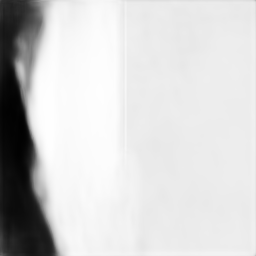

In [38]:
pred_img

In [0]:
img = Image.open('../masks/01b5362cce.png')

In [0]:
.cp

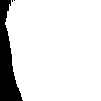

In [32]:
img